In [1]:
import yfinance as yf
import numpy as np
from autograd import grad
import autograd.numpy as np_


/Users/jgfaraco/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [47]:
def accuracy(y_test, y_est):
    return np.mean((y_est-y_test)**2)

In [45]:
def erro(parametros):
    w,x,y=parametros
    y_est = x@w.T
    mse = (y-y_est)**2
    return(np_.mean(mse))

In [46]:
def plot_erro(parametros):
    w,x,y=parametros
    y_est = x@w.T
    mse = (y-y_est)**2
    return(np_.mean(mse))

In [48]:
def normalizar(dados):
    # Normaliza os dados para a faixa [0, 1]
    return (dados - np.min(dados)) / (np.max(dados) - np.min(dados))

In [49]:
def preparar_dados(data, window=5):
    X, Y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        Y.append(data[i + window])
    return np.array(X), np.array(Y)

In [58]:



def execute(ticker, periodo):
    acao = yf.Ticker(ticker)
    hist = acao.history(period=periodo)
    
    hist_train = hist[:int(len(hist) * 0.7)]
    hist_test = hist[int(len(hist) * 0.7):]
    alpha = 0.01
    
    hist_train = hist_train[['Close']].dropna()
    hist_test = hist_test[['Close']].dropna()
    

    X_train, Y_train = preparar_dados(hist_train['Close'].values)
    X_test, Y_test = preparar_dados(hist_test['Close'].values)
    
    X_train = normalizar(X_train)
    Y_train = normalizar(Y_train)
    X_test = normalizar(X_test)
    Y_test = normalizar(Y_test)
    w = np.random.rand(X_train.shape[1])
    print(X_train.shape,Y_train.shape,w.shape)
    list_erros=[]
    for n in range(1000):  
        g = grad(erro)
        grad_ = g((w, X_train, Y_train))
        erro_plot= plot_erro((w, X_train, Y_train))
        list_erros.append(erro_plot)
        w -= alpha * grad_[0]
    
    y_est =X_test@ w
    acuracia = accuracy(Y_test, y_est)
    return  list_erros

erros=(execute("MSFT", "10y"))




(1756, 5) (1756,) (5,)


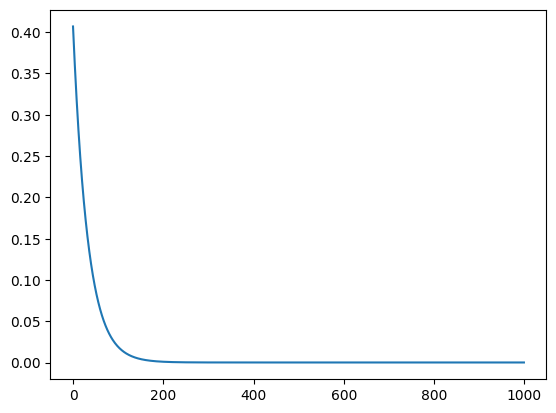

In [59]:
import matplotlib.pyplot as plt
plt.plot(erros)